# Pitchfork

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sqlite3

In [2]:
os.chdir(r'../Data')

In [3]:
conn=sqlite3.connect('./database.sqlite')

In [4]:
print(pd.read_sql_query('select * from artists',conn).head())
# print(pd.read_sql_query('select * from artists',conn).columns.values)
print(pd.read_sql_query('select * from artists',conn).columns)

   reviewid          artist
0     22703  massive attack
1     22721        krallice
2     22659    uranium club
3     22661         kleenex
4     22661         liliput
Index(['reviewid', 'artist'], dtype='object')


In [5]:
print(pd.read_sql_query('select * from content',conn).head())

   reviewid                                            content
0     22703  “Trip-hop” eventually became a ’90s punchline,...
1     22721  Eight years, five albums, and two EPs in, the ...
2     22659  Minneapolis’ Uranium Club seem to revel in bei...
3     22661  Kleenex began with a crash. It transpired one ...
4     22725  It is impossible to consider a given release b...


In [6]:
pd.read_sql_query('select * from content',conn)['content'][1]

'Eight years, five albums, and two EPs in, the New York-based outfit Krallice have long since shut up purists about their “hipster black metal.” Their four-man, post-structural assembly line runs at a breakneck pace, taking great care to balance the intricate (Colin Marston and Mick Barr’s interlocking riffs, Lev Weinstein’s head-spinning polyrhythms) with the incendiary (best exemplified by Barr and Nick McMaster’s shared, animalistic vocal duties; the former’s a screaming eagle, the latter a growling hellhound). The quartet frequently capitalize on the element of surprise; Krallice’s last two releases—2015’s Ygg Huur\xa0and last winter’s Hyperion\xa0EP—dropped spontaneously, a pair of inter-dimensional rifts masquerading as albums, far from the hum of the hype machine. Early last month, the band opened the portal once more to announce their sixth album Prelapsarian, subsequently released sans fanfare on the Winter Solstice. Upon first glance, Prelapsarian, which the band recorded las

In [7]:
pd.read_sql_query('select * from genres',conn).head()

reviewid       genre
0     22703  electronic
1     22721       metal
2     22659        rock
3     22661        rock
4     22725  electronic

In [8]:
pd.read_sql_query('select * from labels',conn).head()

reviewid               label
0     22703              virgin
1     22721           hathenter
2     22659        static shock
3     22659  fashionable idiots
4     22661     kill rock stars

In [9]:
reviews=pd.read_sql_query('select * from reviews',conn)
reviews.head()

reviewid                 title            artist  \
0     22703             mezzanine    massive attack   
1     22721          prelapsarian          krallice   
2     22659  all of them naturals      uranium club   
3     22661           first songs  kleenex, liliput   
4     22725             new start              taso   

                                                 url  score  best_new_music  \
0  http://pitchfork.com/reviews/albums/22703-mezz...    9.3               0   
1  http://pitchfork.com/reviews/albums/22721-prel...    7.9               0   
2  http://pitchfork.com/reviews/albums/22659-all-...    7.3               0   
3  http://pitchfork.com/reviews/albums/22661-firs...    9.0               1   
4  http://pitchfork.com/reviews/albums/22725-new-...    8.1               0   

           author               author_type    pub_date  pub_weekday  pub_day  \
0     nate patrin               contributor  2017-01-08            6        8   
1        zoe camp               contributor  2017-01-07            5        7   
2  david glickman               contributor  2017-01-07            5        7   
3      jenn pelly  associate reviews editor  2017-01-06            4        6   
4    kevin lozano        tracks coordinator  2017-01-06            4        6   

   pub_month  pub_year  
0          1      2017  
1          1      2017  
2          1      2017  
3          1      2017  
4          1      2017

In [10]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewid        18393 non-null  int64  
 1   title           18393 non-null  object 
 2   artist          18393 non-null  object 
 3   url             18393 non-null  object 
 4   score           18393 non-null  float64
 5   best_new_music  18393 non-null  int64  
 6   author          18393 non-null  object 
 7   author_type     14487 non-null  object 
 8   pub_date        18393 non-null  object 
 9   pub_weekday     18393 non-null  int64  
 10  pub_day         18393 non-null  int64  
 11  pub_month       18393 non-null  int64  
 12  pub_year        18393 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 1.8+ MB


In [11]:
reviews['best_new_music'].value_counts()

0    17450
1      943
Name: best_new_music, dtype: int64

In [12]:
pd.read_sql_query('select * from years',conn).head()

reviewid    year
0     22703  1998.0
1     22721  2016.0
2     22659  2016.0
3     22661  2016.0
4     22725  2016.0

In [13]:
df=pd.read_sql_query("select r.reviewid,r.title,r.score,r.best_new_music,a.artist,r.author,r.author_type,r.pub_month,r.pub_year,g.genre,l.label from reviews r left join labels l on r.reviewid=l.reviewid left join genres g on r.reviewid=g.reviewid join artists a on r.reviewid=a.reviewid",conn)
df.head()

reviewid                 title  score  best_new_music          artist  \
0     22703             mezzanine    9.3               0  massive attack   
1     22721          prelapsarian    7.9               0        krallice   
2     22659  all of them naturals    7.3               0    uranium club   
3     22659  all of them naturals    7.3               0    uranium club   
4     22661           first songs    9.0               1         kleenex   

           author               author_type  pub_month  pub_year       genre  \
0     nate patrin               contributor          1      2017  electronic   
1        zoe camp               contributor          1      2017       metal   
2  david glickman               contributor          1      2017        rock   
3  david glickman               contributor          1      2017        rock   
4      jenn pelly  associate reviews editor          1      2017        rock   

                label  
0              virgin  
1           hathenter  
2  fashionable idiots  
3        static shock  
4     kill rock stars

In [14]:
conn.close()

In [15]:
#df=pd.read_sql_query("select r.reviewid,r.title,r.artist,r.url,r.score,r.best_new_music,r.author,r.author_type,r.pub_date,r.pub_weekday,r.pub_day,r.pub_month,r.pub_year,y.year from reviews r left join years y on r.reviewid=y.reviewid left join labels l on r.reviewid=l.reviewid left join genres g on r.reviewid=g.reviewid left join content c on r.reviewid=c.reviewid",conn)
#df.head()

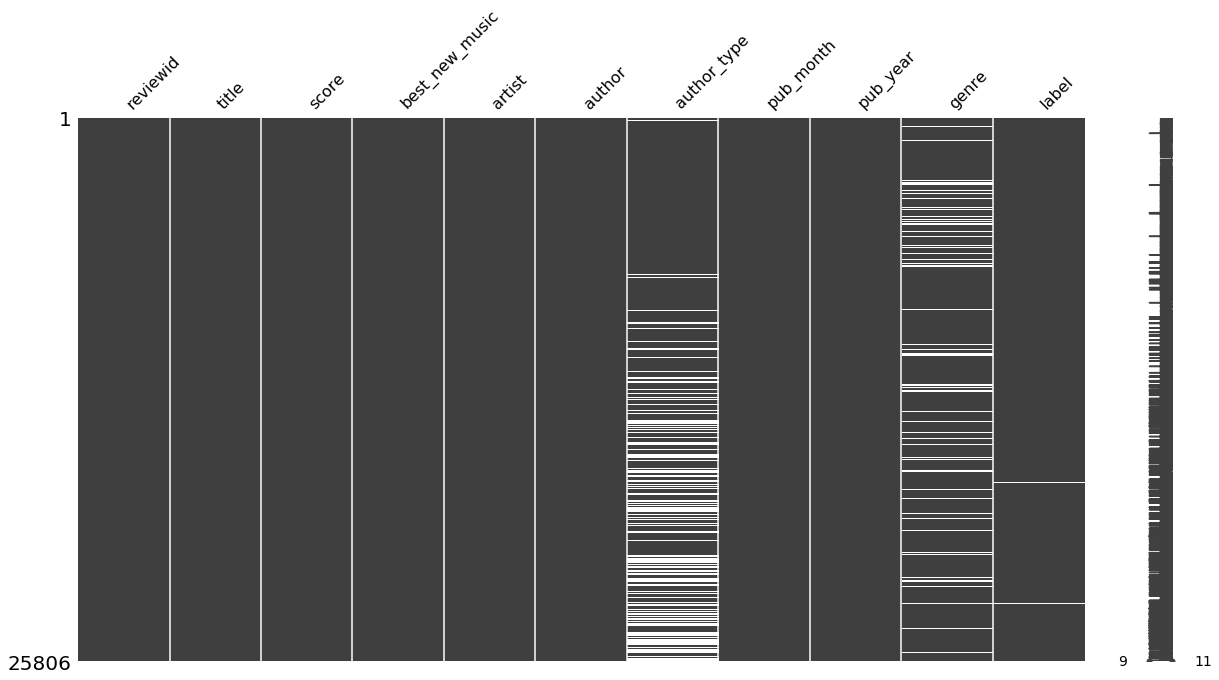

In [16]:
import missingno
missingno.matrix(df,figsize=(20,10))

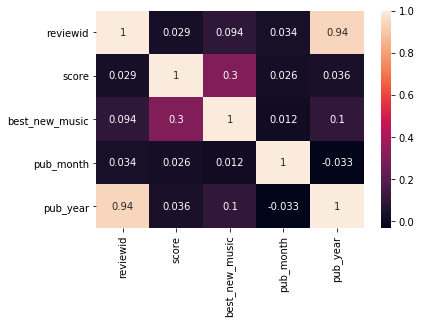

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
df.isnull().sum()

reviewid             0
title                0
score                0
best_new_music       0
artist               0
author               0
author_type       5630
pub_month            0
pub_year             0
genre             2591
label               44
dtype: int64

In [19]:
df=df.drop(['reviewid','title'],axis=1)

In [20]:
df.head()

score  best_new_music          artist          author  \
0    9.3               0  massive attack     nate patrin   
1    7.9               0        krallice        zoe camp   
2    7.3               0    uranium club  david glickman   
3    7.3               0    uranium club  david glickman   
4    9.0               1         kleenex      jenn pelly   

                author_type  pub_month  pub_year       genre  \
0               contributor          1      2017  electronic   
1               contributor          1      2017       metal   
2               contributor          1      2017        rock   
3               contributor          1      2017        rock   
4  associate reviews editor          1      2017        rock   

                label  
0              virgin  
1           hathenter  
2  fashionable idiots  
3        static shock  
4     kill rock stars

# Features

## Artists

In [21]:
df['artist'].value_counts()

various artists                 785
xiu xiu                          42
prince                           40
animal collective                36
deerhoof                         36
                               ... 
fins                              1
john wizards                      1
cullen omori                      1
zmrzlina                          1
alan singley & pants machine      1
Name: artist, Length: 8633, dtype: int64

## Score

In [22]:
df['score']

0        9.3
1        7.9
2        7.3
3        7.3
4        9.0
        ... 
25801    6.3
25802    7.2
25803    7.2
25804    7.2
25805    6.5
Name: score, Length: 25806, dtype: float64

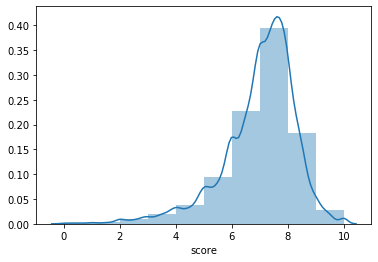

In [23]:
sns.distplot(df['score'],bins=10)

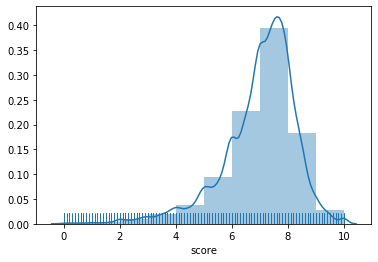

In [24]:
sns.distplot(a=df.score,bins=10,hist=True,kde=True,rug=True);


In [25]:
df['score'].value_counts(bins=10)

(7.0, 8.0]       10104
(6.0, 7.0]        6474
(8.0, 9.0]        3759
(5.0, 6.0]        2818
(4.0, 5.0]        1147
(3.0, 4.0]         568
(9.0, 10.0]        519
(2.0, 3.0]         260
(1.0, 2.0]         105
(-0.011, 1.0]       52
Name: score, dtype: int64

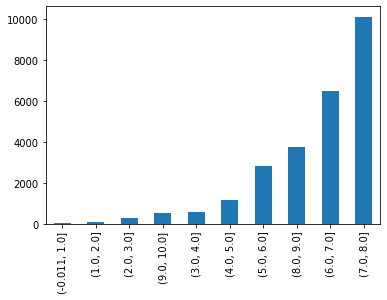

In [26]:
df['score'].value_counts(bins=10,ascending=True).plot(kind='bar',)

In [27]:
q1=df['score'].quantile(0.25)
q3=df['score'].quantile(0.75)
iqr=q3-q1
high=q3+(1.5*iqr)
low=q1-(1.5*iqr)
df.drop(df[df['score']>high].index,inplace=True)
df.drop(df[df['score']<low].index,inplace=True)

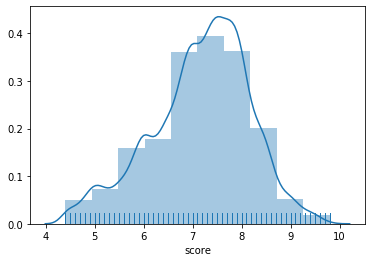

In [28]:
sns.distplot(a=df.score,bins=10,hist=True,kde=True,rug=True);

## Best New Music

In [29]:
df['best_new_music'].value_counts()

0    23185
1     1328
Name: best_new_music, dtype: int64

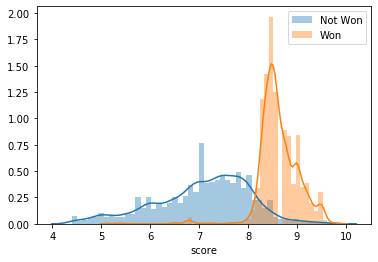

In [30]:
sns.distplot(df[df['best_new_music']==0]['score'])
sns.distplot(df[df['best_new_music']==1]['score'])
plt.legend(labels=['Not Won','Won'])
plt.show()

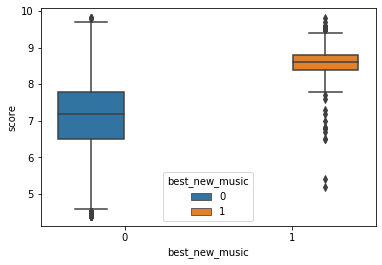

In [31]:
plt.figure()
sns.boxplot(y='score',x='best_new_music',hue='best_new_music',data=df)

In [32]:
df[(df['score']<4)&(df['best_new_music']==1)]

Empty DataFrame
Columns: [score, best_new_music, artist, author, author_type, pub_month, pub_year, genre, label]
Index: []

## Author

In [33]:
df['author'].value_counts(dropna=False)

joe tangari                                    1098
ian cohen                                       851
stephen m. deusner                              821
brian howe                                      699
mark richardson                                 682
                                               ... 
noah sutcliffe                                    1
sean t. collins                                   1
casey rea                                         1
savy reyes-kulkarni                               1
andy beta, brandon stosuy & mark richardson       1
Name: author, Length: 423, dtype: int64

In [34]:
df[df['score']>7]['author'].value_counts()

joe tangari           809
mark richardson       487
stephen m. deusner    475
brian howe            413
marc masters          375
                     ... 
andy o' connor          1
jonny pietin            1
yancey strickler        1
tayler montague         1
sean fennessy           1
Name: author, Length: 386, dtype: int64

In [35]:
df=df.drop(['author'],axis=1)

## Author Type

In [36]:
df['author_type'].value_counts(dropna=False)

contributor                  16483
NaN                           5259
senior editor                  681
executive editor               680
senior staff writer            572
contributing editor            241
deputy news editor             131
associate staff writer         129
editor-in-chief                127
associate reviews editor        59
tracks coordinator              56
associate editor                54
assistant editor                19
associate features editor       16
news director                    3
managing editor                  3
Name: author_type, dtype: int64

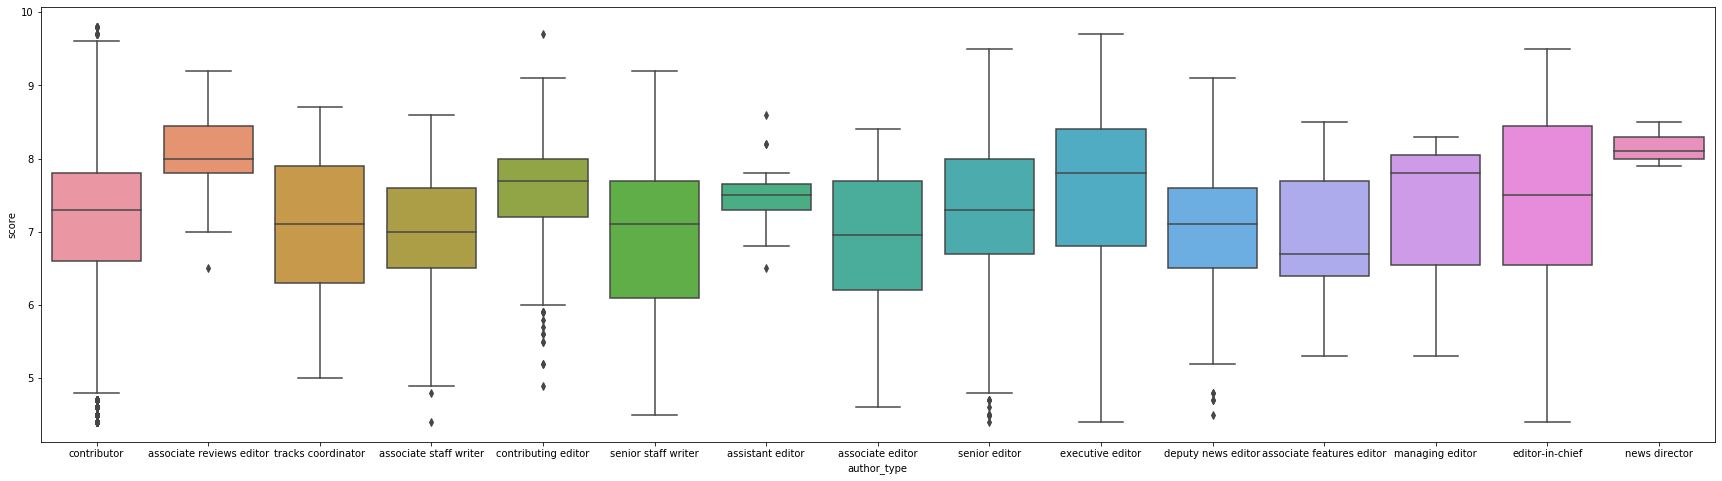

In [37]:
plt.figure(figsize=(30,8))
sns.boxplot(x='author_type',data=df,y='score')

In [39]:
df['author_type']=df['author_type'].fillna('None')

In [40]:
df.isnull().sum()

score                0
best_new_music       0
artist               0
author_type          0
pub_month            0
pub_year             0
genre             2490
label               44
dtype: int64

## Date
### pub_month,pub_year

In [41]:
df['pub_year'].value_counts()

2011    1727
2006    1697
2010    1654
2016    1635
2007    1627
2008    1603
2012    1577
2013    1574
2005    1553
2004    1533
2014    1522
2009    1519
2003    1389
2015    1332
2002    1170
2001     588
2000     473
1999     319
2017      21
Name: pub_year, dtype: int64

In [42]:
df[df['best_new_music']==1].groupby(by='pub_year').mean()['score']

pub_year
2003    8.680769
2004    8.691803
2005    8.698305
2006    8.668750
2007    8.658571
2008    8.596667
2009    8.599153
2010    8.658678
2011    8.652308
2012    8.670085
2013    8.588430
2014    8.652632
2015    8.598980
2016    8.486719
2017    8.920000
Name: score, dtype: float64

In [43]:
df.groupby(by=['pub_year']).mean().T

pub_year            1999      2000      2001      2002      2003      2004  \
score           7.156113  7.280550  7.394898  7.233162  7.304968  7.369602   
best_new_music  0.000000  0.000000  0.000000  0.000000  0.056156  0.039791   
pub_month       6.357367  6.408034  8.061224  6.255556  6.268539  6.390085   

pub_year            2005      2006      2007      2008      2009      2010  \
score           7.289375  7.170301  7.092440  7.090206  6.946017  7.101511   
best_new_music  0.037991  0.028285  0.043024  0.037430  0.077683  0.073156   
pub_month       6.397296  6.416028  6.214505  5.976294  6.157999  6.237001   

pub_year            2011      2012      2013      2014      2015      2016  \
score           7.119861  7.065187  7.041487  7.148292  7.154505  7.249786   
best_new_music  0.075275  0.074192  0.076874  0.074901  0.073574  0.078287   
pub_month       5.985524  6.029803  6.202668  6.316032  6.317568  6.412232   

pub_year            2017  
score           7.780952  
best_new_music  0.238095  
pub_month       1.000000

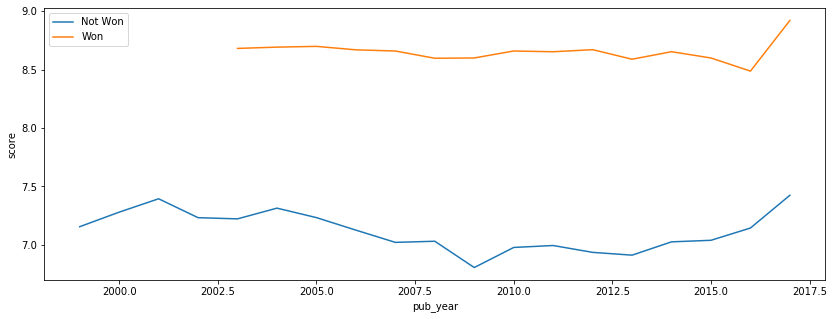

In [44]:
plt.figure(figsize=(14,5))
sns.lineplot(y=df[df['best_new_music']==0].groupby(by='pub_year').mean()['score'], x=df[df['best_new_music']==0].groupby(by='pub_year').mean().index)
sns.lineplot(y=df[df['best_new_music']==1].groupby(by='pub_year').mean()['score'], x=df[df['best_new_music']==1].groupby(by='pub_year').mean().index)
plt.legend(labels=['Not Won','Won'])
plt.show()

## Inference
    1.Best New Music awards started from 2003
    2. Removing values from 2017 since it seems that data has been taken from early 2017

In [45]:
df=df[(df['pub_year']<2017)]

### pub_month

In [46]:
df['pub_month'].value_counts()

10    2381
3     2262
4     2258
6     2202
5     2180
9     2126
2     2033
11    2018
1     1983
8     1982
7     1971
12    1096
Name: pub_month, dtype: int64

## Genre

In [47]:
df['genre'].value_counts(dropna=False)

rock            9974
electronic      4125
NaN             2488
experimental    2070
rap             1825
pop/r&b         1581
metal            892
folk/country     755
jazz             509
global           273
Name: genre, dtype: int64

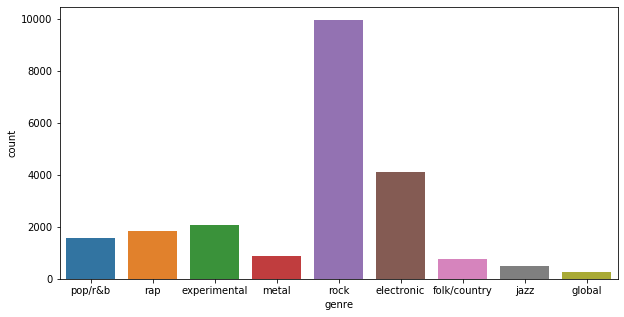

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(df['genre'])
plt.show()

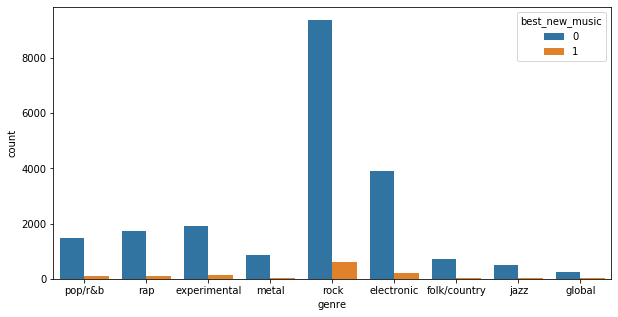

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(x='genre',hue='best_new_music',data=df)
plt.show()

## Labels

In [50]:
df['label'].isnull().sum()

44

In [51]:
df['label'].fillna('None',inplace=True)

## Base Model

In [52]:
df.head()

score  best_new_music             artist             author_type  \
23    8.1               0  chance the rapper  associate staff writer   
24    8.1               0            jeremih  associate staff writer   
25    8.1               0  chance the rapper  associate staff writer   
26    8.1               0            jeremih  associate staff writer   
27    7.2               0    jamire williams             contributor   

    pub_month  pub_year         genre          label  
23         12      2016       pop/r&b  self-released  
24         12      2016       pop/r&b  self-released  
25         12      2016           rap  self-released  
26         12      2016           rap  self-released  
27         12      2016  experimental        leaving

In [53]:
## Shape before Dropping
df.shape

(24492, 8)

In [54]:
cat_cols=list(df.select_dtypes(include=['object']).columns)
cat_cols

['artist', 'author_type', 'genre', 'label']

In [55]:
cols=['author_type','genre']
df=pd.get_dummies(df,columns=cols,drop_first=True)

In [56]:
df['label'].isnull().sum()

0

In [57]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['artist']=le.fit_transform(df['artist'])
#df['author']=le.fit_transform(df['author'])
df['label']=le.fit_transform(df['label'])
#df['pub_year']=le.fit_transform(df['pub_year'])

In [58]:
#df=df.dropna()

### MICE imputer

In [59]:
'''from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)'''

'from sklearn.experimental import enable_iterative_imputer\nfrom sklearn.impute import IterativeImputer\nimp = IterativeImputer(max_iter=10, random_state=0)'

In [60]:
'''df=pd.DataFrame(imp.fit_transform(df))'''

'df=pd.DataFrame(imp.fit_transform(df))'

In [61]:
## Shape after dropping
#df.shape

In [62]:
df.head()

score  best_new_music  artist  pub_month  pub_year  label  \
23    8.1               0    1209         12      2016   2757   
24    8.1               0    3443         12      2016   2757   
25    8.1               0    1209         12      2016   2757   
26    8.1               0    3443         12      2016   2757   
27    7.2               0    3342         12      2016   1786   

    author_type_assistant editor  author_type_associate editor  \
23                             0                             0   
24                             0                             0   
25                             0                             0   
26                             0                             0   
27                             0                             0   

    author_type_associate features editor  \
23                                      0   
24                                      0   
25                                      0   
26                                      0   
27                                      0   

    author_type_associate reviews editor  ...  \
23                                     0  ...   
24                                     0  ...   
25                                     0  ...   
26                                     0  ...   
27                                     0  ...   

    author_type_senior staff writer  author_type_tracks coordinator  \
23                                0                               0   
24                                0                               0   
25                                0                               0   
26                                0                               0   
27                                0                               0   

    genre_experimental  genre_folk/country  genre_global  genre_jazz  \
23                   0                   0             0           0   
24                   0                   0             0           0   
25                   0                   0             0           0   
26                   0                   0             0           0   
27                   1                   0             0           0   

    genre_metal  genre_pop/r&b  genre_rap  genre_rock  
23            0              1          0           0  
24            0              1          0           0  
25            0              0          1           0  
26            0              0          1           0  
27            0              0          0           0  

[5 rows x 29 columns]

In [63]:
df.iloc[:,[1]]

best_new_music
23                  0
24                  0
25                  0
26                  0
27                  0
...               ...
25801               0
25802               0
25803               0
25804               0
25805               0

[24492 rows x 1 columns]

In [64]:
df.isnull().sum()

score                                    0
best_new_music                           0
artist                                   0
pub_month                                0
pub_year                                 0
label                                    0
author_type_assistant editor             0
author_type_associate editor             0
author_type_associate features editor    0
author_type_associate reviews editor     0
author_type_associate staff writer       0
author_type_contributing editor          0
author_type_contributor                  0
author_type_deputy news editor           0
author_type_editor-in-chief              0
author_type_executive editor             0
author_type_managing editor              0
author_type_news director                0
author_type_senior editor                0
author_type_senior staff writer          0
author_type_tracks coordinator           0
genre_experimental                       0
genre_folk/country                       0
genre_globa

## Generating X and Y

In [65]:
y=df['score']
X=df.drop('score',axis=1)

## 1. Base Model

In [66]:
import statsmodels.api as sm
xc=sm.add_constant(X)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     148.3
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        11:30:10   Log-Likelihood:                -32972.
No. Observations:               24492   AIC:                         6.600e+04
Df Residuals:                   24463   BIC:                         6.624e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    54.2319      3.006     18.038      0.000      48.339      60.125
best_new_music                            1.5632      0.027     58.465      0.000       1.511       1.616
artist                                 4.833e-06   2.44e-06      1.983      0.047    5.51e-08    9.61e-06
pub_month                                 0.0049      0.002      2.705      0.007       0.001       0.008
pub_year                                 -0.0236      0.001    -15.721      0.000      -0.027      -0.021
label                                  1.152e-05   5.76e-06      2.001      0.045    2.36e-07    2.28e-05
author_type_assistant editor              0.6032      0.215      2.811      0.005       0.183       1.024
author_type_associate editor             -0.1316      0.128     -1.030      0.303      -0.382       0.119
author_type_associate features editor    -0.0588      0.234     -0.252      0.801      -0.517       0.399
author_type_associate reviews editor      0.6651      0.127      5.235      0.000       0.416       0.914
author_type_associate staff writer        0.1309      0.085      1.534      0.125      -0.036       0.298
author_type_contributing editor           0.5622      0.063      8.906      0.000       0.439       0.686
author_type_contributor                   0.1080      0.016      6.663      0.000       0.076       0.140
author_type_deputy news editor            0.0748      0.083      0.898      0.369      -0.089       0.238
author_type_editor-in-chief               0.0015      0.084      0.018      0.985      -0.163       0.166
author_type_executive editor              0.2442      0.038      6.344      0.000       0.169       0.320
author_type_managing editor              -0.1737      0.538     -0.323      0.747      -1.228       0.880
author_type_news director                 0.6148      0.537      1.144      0.253      -0.439       1.668
author_type_senior editor                 0.1092      0.039      2.775      0.006       0.032       0.186
author_type_senior staff writer          -0.1487      0.041     -3.596      0.000      -0.230      -0.068
author_type_tracks coordinator            0.0912      0.127      0.716      0.474      -0.158       0.341
genre_experimental                        0.2147      0.024      9.131      0.000       0.169       0.261
genre_folk/country                        0.1732      0.036      4.824      0.000       0.103       0.244
genre_global                              0.2852      0.058      4.959      0.000       0.172       0.398
genre_jazz                                0.3110      0.043      7.247      0.000       0.227       0.395
genre_metal                               0.1299      0.033      3.898      0.000       0.065       0.195
genre_pop

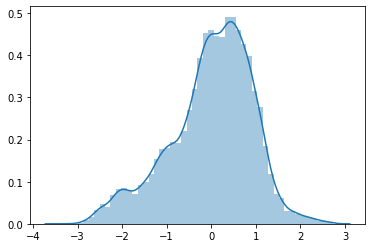

In [67]:
residuals=model.resid
sns.distplot(residuals)

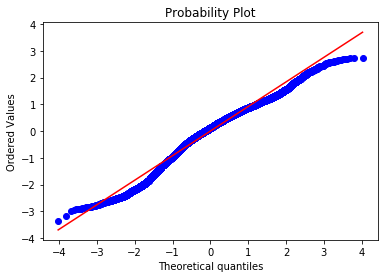

In [68]:
import scipy.stats as stats
stats.probplot(residuals,plot=plt)
plt.show()

## 2. Model using Backward Elimation method

In [69]:
# Backward Elimination
cols=list(X.columns)
pmax=1
while len(cols)>0:
    p=[]
    C=X[cols]
    xc=sm.add_constant(C)
    model=sm.OLS(y,xc).fit()
    p=pd.Series(model.pvalues.values[1:],index=cols)
    pmax=max(p)
    feature_with_p_max=p.idxmax()
    if pmax>0.05:
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_cols=cols
print(selected_cols)

['best_new_music', 'artist', 'pub_month', 'pub_year', 'label', 'author_type_assistant editor', 'author_type_associate reviews editor', 'author_type_contributing editor', 'author_type_contributor', 'author_type_executive editor', 'author_type_senior editor', 'author_type_senior staff writer', 'genre_experimental', 'genre_folk/country', 'genre_global', 'genre_jazz', 'genre_metal', 'genre_pop/r&b']


In [70]:
X_final=df[cols]
y=df['score']

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error as mse
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.3,random_state=0)

In [72]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred_train=LR.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.14430543037220545
RMSE of Train: 0.9327029524801203


In [73]:
y_pred_test=LR.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.14474272613390293
RMSE of Test: 0.9242594240943467


## 3. K-Fold

In [74]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=0)
for model,name in zip([LR],['MVLR']):
    rmse=[]

    for train, test in kf.split(X_final,y):
        X_train,X_test=X_final.iloc[train,:],X_final.iloc[test,:]
        y_train,y_test=y.iloc[train],y.iloc[test]
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        rmse.append(np.sqrt(mse(y_test,y_pred)))
print(rmse)

[0.9294702295868941, 0.9232759272101888, 0.9371418205262073, 0.9372243400536454, 0.9266810711602816]


In [75]:
np.mean(rmse),np.var(rmse,ddof=1)


(0.9307586777074434, 3.92069576341998e-05)

### 4.Lasso/Ridge/ElasticNet

## 4.1 Lasso

In [76]:
from sklearn.linear_model import Lasso,LassoCV
lasso=Lasso(alpha=0.04,normalize=True)

In [77]:
X_final=df[cols]
y=df['score']
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.3,random_state=0)

In [78]:
lasso.fit(X_train,y_train)
y_pred_train=lasso.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.0
RMSE of Train: 1.0082865258703986


In [79]:
y_pred_test=lasso.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: -0.0005452640909751061
RMSE of Test: 0.9996865972261615


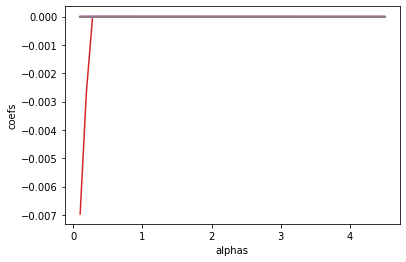

In [80]:
n_alphas = 50
alphas = np.linspace(0.1,4.5, n_alphas)
coefs=[]
lasso = Lasso()
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    
plt.plot(alphas, coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

In [81]:
n_alphas=50
alphas=np.linspace(0.1,1, n_alphas)

lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=22)
lasso_cv.fit(X,y)

LassoCV(alphas=array([0.1       , 0.11836735, 0.13673469, 0.15510204, 0.17346939,
       0.19183673, 0.21020408, 0.22857143, 0.24693878, 0.26530612,
       0.28367347, 0.30204082, 0.32040816, 0.33877551, 0.35714286,
       0.3755102 , 0.39387755, 0.4122449 , 0.43061224, 0.44897959,
       0.46734694, 0.48571429, 0.50408163, 0.52244898, 0.54081633,
       0.55918367, 0.57755102, 0.59591837, 0.61428571, 0.63265306,
       0.65102...
       0.74285714, 0.76122449, 0.77959184, 0.79795918, 0.81632653,
       0.83469388, 0.85306122, 0.87142857, 0.88979592, 0.90816327,
       0.92653061, 0.94489796, 0.96326531, 0.98163265, 1.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=22, selection='cyclic', tol=0.0001,
        verbose=False)

In [82]:
lasso_cv.alpha_

0.2653061224489796

In [83]:
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(X_train, y_train)
lasso.coef_
pd.DataFrame(lasso.coef_, X_final.columns, columns=['coefs'])

coefs
best_new_music                        0.000000
artist                                0.000005
pub_month                             0.000000
pub_year                             -0.000000
label                                 0.000008
author_type_assistant editor          0.000000
author_type_associate reviews editor  0.000000
author_type_contributing editor       0.000000
author_type_contributor               0.000000
author_type_executive editor          0.000000
author_type_senior editor             0.000000
author_type_senior staff writer      -0.000000
genre_experimental                    0.000000
genre_folk/country                    0.000000
genre_global                          0.000000
genre_jazz                            0.000000
genre_metal                           0.000000
genre_pop/r&b                        -0.000000

In [84]:
y_pred_train=lasso.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.00022078667543723451
RMSE of Train: 1.0081752116109155


In [85]:
y_pred_test=lasso.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: -0.0006151094480690844
RMSE of Test: 0.9997214893251833


### 4.2 Ridge

In [86]:
from sklearn.linear_model import Ridge,RidgeCV
ridge=Ridge(alpha=0.05)

In [87]:
ridge.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.14389931895882546
RMSE of Train: 0.9329242559662783


In [88]:
y_pred_test=ridge.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.14474325132236643
RMSE of Test: 0.9242591403139708


In [89]:
ridge.fit(X, y)
ridge.coef_
pd.DataFrame(ridge.coef_, X.columns, columns=['coefs'])

coefs
best_new_music                         1.563147
artist                                 0.000005
pub_month                              0.004868
pub_year                              -0.023563
label                                  0.000012
author_type_assistant editor           0.601523
author_type_associate editor          -0.131566
author_type_associate features editor -0.058663
author_type_associate reviews editor   0.664468
author_type_associate staff writer     0.130845
author_type_contributing editor        0.562083
author_type_contributor                0.107982
author_type_deputy news editor         0.074698
author_type_editor-in-chief            0.001520
author_type_executive editor           0.244184
author_type_managing editor           -0.170892
author_type_news director              0.604730
author_type_senior editor              0.109149
author_type_senior staff writer       -0.148750
author_type_tracks coordinator         0.091021
genre_experimental                     0.214715
genre_folk/country                     0.173142
genre_global                           0.285161
genre_jazz                             0.310927
genre_metal                            0.129871
genre_pop/r&b                         -0.077592
genre_rap                             -0.030278
genre_rock                            -0.023730

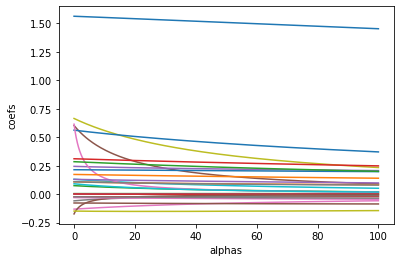

In [90]:
n_alphas = 200
alphas = np.logspace(-3, 2, n_alphas)
coefs=[]
model = Ridge()
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
    
plt.plot(alphas, coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

In [91]:
n_alphas = 1000
alphas = np.logspace(-2, 0)

ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X, y)

ridge_cv.alpha_

1.0

In [92]:
ridge=Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [93]:
y_pred_train=ridge.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.1443030886417922
RMSE of Train: 0.9327042287166734


In [94]:
y_pred_test=ridge.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.14475092451479
RMSE of Test: 0.9242549941706337


### 4.3 Elastic Net/Elastic Net CV

In [95]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
enet = ElasticNet(alpha=0.1)
enet.fit(X_train, y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [96]:
y_pred_train=enet.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.04565025094379305
RMSE of Train: 0.9850034358791212


In [97]:
y_pred_test=enet.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.04553441886372367
RMSE of Test: 0.9763951988615229


In [98]:
pd.DataFrame(enet.coef_, X_final.columns, columns=['coefs'])

coefs
best_new_music                        0.295396
artist                                0.000005
pub_month                             0.003786
pub_year                             -0.010764
label                                 0.000009
author_type_assistant editor          0.000000
author_type_associate reviews editor  0.000000
author_type_contributing editor       0.000000
author_type_contributor               0.000000
author_type_executive editor          0.000000
author_type_senior editor             0.000000
author_type_senior staff writer      -0.000000
genre_experimental                    0.000000
genre_folk/country                    0.000000
genre_global                          0.000000
genre_jazz                            0.000000
genre_metal                           0.000000
genre_pop/r&b                        -0.000000

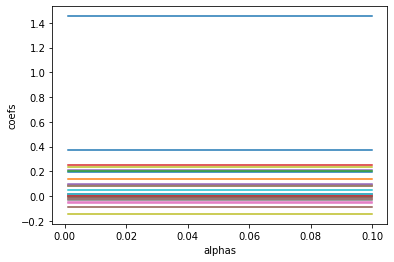

In [99]:
n_alphas = 200
alphas = np.logspace(-3, -1, n_alphas)
coefs=[]
enet = ElasticNet()
for a in alphas:
    enet.set_params(alpha=a)
    enet.fit(X_final, y)
    coefs.append(model.coef_)
    
plt.plot(alphas, coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

In [100]:
n_alphas = 2000
alphas = np.logspace(-3, 1, n_alphas)

en_cv = ElasticNetCV(alphas=alphas, cv=3)
en_cv.fit(X_final, y)
en_cv.alpha_

0.001

In [101]:
enet = ElasticNet(alpha=en_cv.alpha_)
enet.fit(X_train,y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [102]:
y_pred_train=enet.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.1435346227564701
RMSE of Train: 0.9331229462102174


In [103]:
y_pred_test=enet.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.1442754003324922
RMSE of Test: 0.9245119044309903


### 5 Decision Tree

In [104]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=6,max_leaf_nodes=10)


In [105]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [106]:
y_pred_train=dtr.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.14666176758992255
RMSE of Train: 0.9314178690831162


In [107]:
y_pred_test=dtr.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.14389222494186404
RMSE of Test: 0.9247188697108801


### 6. Random Forest

In [108]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [109]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [110]:
y_pred_train=rfr.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.898223548897644
RMSE of Train: 0.32166781953790363


In [111]:
y_pred_test=rfr.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.2850066717559496
RMSE of Test: 0.8450774125225143


In [112]:
rfr.feature_importances_

array([1.19976280e-01, 3.07215391e-01, 1.31012647e-01, 1.07155247e-01,
       2.62404585e-01, 9.41150448e-05, 5.27746510e-04, 2.91405153e-03,
       1.65684660e-02, 5.47224355e-03, 5.40748485e-03, 5.75547327e-03,
       6.34079282e-03, 5.28237350e-03, 2.71714522e-03, 4.59428322e-03,
       5.60221005e-03, 1.09594652e-02])

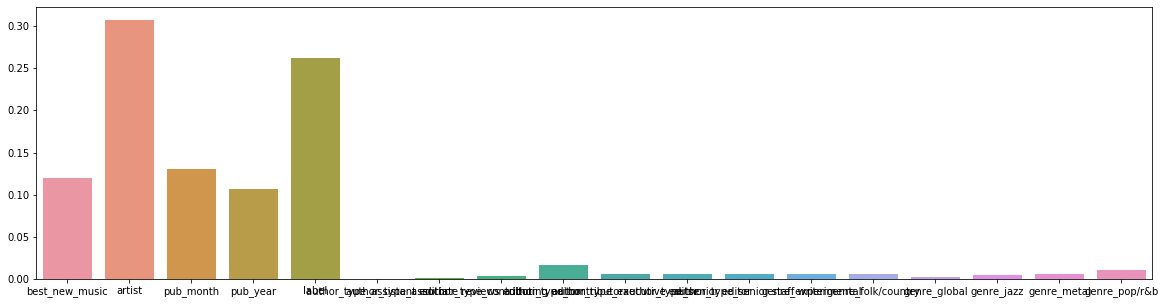

In [113]:
plt.figure(figsize=(20,5))
sns.barplot(x=X_final.columns,y=rfr.feature_importances_)

### 7. KNN

In [114]:
from sklearn.neighbors import KNeighborsRegressor
knnr=KNeighborsRegressor(n_neighbors=5)

In [115]:
knnr.fit(X_train,y_train)
y_pred_train=knnr.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.327520013873004
RMSE of Train: 0.8268441259306946


In [116]:
y_pred_test=knnr.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: -0.045345405373053316
RMSE of Test: 1.0218223711016667


### 8. Bayesian Ridge

In [117]:
from sklearn.linear_model import BayesianRidge
bay=BayesianRidge()

In [118]:
bay.fit(X_train,y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [119]:
y_pred_train=bay.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.1442744429519328
RMSE of Train: 0.9327198403965276


In [120]:
y_pred_test=bay.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.14475270488281777
RMSE of Test: 0.9242540321614691


### 9. Bagging

In [121]:
from sklearn.ensemble import BaggingRegressor
baggr_lr=BaggingRegressor(base_estimator=LinearRegression())

In [122]:
baggr_lr.fit(X_train,y_train)
y_pred_train=baggr_lr.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.14420269459057988
RMSE of Train: 0.9327589415527955


In [123]:
y_pred_test=baggr_lr.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.14449247448596825
RMSE of Test: 0.9243946351787216


In [124]:
baggr_dt=BaggingRegressor(base_estimator=DecisionTreeRegressor())
baggr_dt.fit(X_train,y_train)
y_pred_train=baggr_dt.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.8600424552043073
RMSE of Train: 0.37720906513947394


In [125]:
y_pred_test=baggr_dt.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.21393772336734673
RMSE of Test: 0.8860821272088143


In [126]:
baggr_knn=BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=5))
baggr_knn.fit(X_train,y_train)
y_pred_train=baggr_knn.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.3591404471873433
RMSE of Train: 0.8071707111445124


In [127]:
y_pred_test=baggr_knn.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: -0.011574730548879364
RMSE of Test: 1.005181496027683


### 10. Boosting

In [128]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=LinearRegression())
ada.fit(X_train,y_train)
y_pred_train=ada.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.12288470912962357
RMSE of Train: 0.9443050335645706


In [129]:
y_pred_test=ada.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.11816441205617156
RMSE of Test: 0.9385108763651665


In [130]:
ada=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1))
ada.fit(X_train,y_train)
y_pred_train=ada.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.10799950832586258
RMSE of Train: 0.9522840503426713


In [131]:
y_pred_test=ada.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.10425824076578971
RMSE of Test: 0.9458818888172508
